# Advanced Business Analytics (CIS442D)

## Homework Assignment 3
### Due date: 1/26/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# Problems from the previous homework that should be submitted together with homework 3

## (1) Databases and sql 
The file "pageviews" contains a table with 4 columns.
1. Load the data file into a table in the empty database "empty_db.sqlite".
2. Write and execute a sql query that computes the sum of the third column of the newly created table.

In [42]:
# write solution here
#1.(1)
import sqlite3
import csv
import pandas as pd


file = open('pageviews')
read = pd.read_csv("pageviews", sep=" ", names=["a","b","c","d"],encoding='utf8')
read.to_csv('pageviews1.csv',index=False)
!head -5 "pageviews1.csv"

con = sqlite3.connect('empty_db.sqlite')
csvfile = open('pageviews1.csv')
csvReader = csv.reader(csvfile)
header = next(csvReader) 

con.execute("DROP TABLE tbl")
con.commit()

con.execute("CREATE TABLE tbl(a TEXT, b TEXT, c INTEGER, d INTEGER);")
con.commit()






a,b,c,d
aa,Main_Page,1,0
aa.d,Main_Page,1,0
aa.m,Main_Page,1,0
ab,1942,1,0


In [43]:
#continued in 1.(1)
for rec in csvReader: # iterate over the other rows
    con.execute("INSERT INTO tbl VALUES %s"%str(tuple(rec)))  
con.commit() 

con = sqlite3.connect('empty_db.sqlite')
df = pd.read_sql_query("SELECT * FROM tbl", con)
con.close()
df


,a,b,c,d
0,aa,Main_Page,1,0
1,aa.d,Main_Page,1,0
2,aa.m,Main_Page,1,0
3,ab,1942,1,0
4,ab,1990,1,0
5,ab,2007,1,0
6,ab,2011,2,0
7,ab,2012,2,0
8,ab,2016,1,0
9,ab,Авикипедиа:Афорум,1,0


In [44]:
#1.(2)Write and execute a sql query that computes the sum of the third column of the newly created table
con = sqlite3.connect('empty_db.sqlite')
df1 = pd.read_sql_query("SELECT sum(c) FROM tbl", con)
con.close()
df1

,sum(c)
0,233058


## (2) Web-scraping 
HTML are XML documents that specify the content and design of web-pages. For example, the file html_example.txt contains the HTML representation of the following table: 

| A | B | C |
|---|---|---|
| D | E | F |


In [95]:
!cat html_example.txt












</TABLE>

The TABLE element is used to indicate the beginning of the table, TR elements indicate beginning of rows, and TD elements indicate beginning of columns. The text that appears between the TD tags specifies cells content. 

As another example, hyperlinks are specified using the A tag. That is, for a link to the website "http://www.w3schools.com" whose label in a webpage is "Visit W3Schools.com", there is a corresponding A element (that is, an element whose tag is A). The file html_example2.txt contains the HTML specification for this link:

In [120]:
!cat html_example2.txt

<a href="http://www.w3schools.com">Visit W3Schools.com!</a> 

Pick a Wikipedia article of your choice. 
1. Print all hyperlinks appearing your article (links to other websites or wikipedia pages)
2. Print a list with Wikipedia articles referenced from your chosen article
3. Choose a webpage (not necessarily in Wikipedia) that contains tabular information. Write code that reads the webpage and creates a DataFrame, which contains that table.

In [40]:
# write solution here
#2.(1)
import requests
page = requests.get('https://en.wikipedia.org/wiki/China')
page.content

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content)

soup.find_all('a')

for link in soup.find_all('a'):
    print(link.get('href'))

//anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file //anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


None
/wiki/Wikipedia:Good_articles
/wiki/Wikipedia:Protection_policy#semi
#mw-head
#p-search
/wiki/Taiwan
/wiki/China_(disambiguation)
/wiki/PRC_(disambiguation)
/wiki/File:Flag_of_the_People%27s_Republic_of_China.svg
/wiki/File:National_Emblem_of_the_People%27s_Republic_of_China.svg
/wiki/Flag_of_the_People%27s_Republic_of_China
/wiki/National_Emblem_of_the_People%27s_Republic_of_China
/wiki/March_of_the_Volunteers
/wiki/File:People%27s_Republic_of_China_(orthographic_projection).svg
/wiki/Beijing
#cite_note-1
//tools.wmflabs.org/geohack/geohack.php?pagename=China&params=39_55_N_116_23_E_type:city
/wiki/Shanghai
#cite_note-2
/wiki/Standard_Chinese
#cite_note-langlaw-3
#cite_note-4
/wiki/Mongolian_language
/wiki/Standard_Tibetan
/wiki/Uyghur_language
/wiki/Standard_Zhuang
/wiki/Languages_of_China
/wiki/Written_vernacular_Chinese
/wiki/Official_script
/wiki/Simplified_Chinese_characters
#cite_note-langlaw-3
/wiki/Ethnic_groups
/wiki/Han_Chinese
#cite_note-census-5
/wiki/List_of_ethnic_g

In [47]:
#2.(2)
import requests
from lxml import html
from lxml import etree
page = requests.get('https://en.wikipedia.org/wiki/China')
page.content
tree = html.fromstring(page.content)
source = tree.xpath("//span[@class='reference-text']")


for i in source:
    ref = etree.tostring(i)
    print(ref)



b'<span class="reference-text"><a href="/wiki/Postal_map_romanization" class="mw-redirect" title="Postal map romanization">Romanized</a> as "Peking" prior to the adoption of <a href="/wiki/Pinyin" title="Pinyin">Pinyin</a>.</span>'
b'<span class="reference-text"><a href="/wiki/Portuguese_language" title="Portuguese language">Portuguese</a> (<a href="/wiki/Macau" title="Macau">Macau</a> only), <a href="/wiki/English_language" title="English language">English</a> (<a href="/wiki/Hong_Kong" title="Hong Kong">Hong Kong</a> only).</span>'
b'<span class="reference-text">Ethnic minorities that are recognized officially.</span>'
b'<span class="reference-text">Xi Jinping holds four concurrent positions: <a href="/wiki/General_Secretary_of_the_Communist_Party_of_China" title="General Secretary of the Communist Party of China">General Secretary of the Communist Party of China</a> (<i>de facto</i> <a href="/wiki/Paramount_leader" title="Paramount leader">paramount leader</a>), <a href="/wiki/Presi

In [175]:
#2.(3)
from lxml import html
from lxml import etree
import requests
import pandas as pd

page = requests.get('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')
page.content
tree = html.fromstring(page.content) # returns root element
tables=tree.xpath('.//table') # retrieve table elements
tables
etree.tostring(tables[1])
wanted_table = tables[1]
wanted_table
wanted_table[0][0].text_content()

rows_parsed = []
for row_elements in wanted_table:
    row = []
    for col_elements in row_elements:
        row.append(col_elements.text_content())
    rows_parsed.append(row)
    
rows_parsed

pd.DataFrame(rows_parsed[1:], columns=rows_parsed[0])

,Rank,Country (or dependent territory),Population,Date,% of world population,Source
0,1,China[Note 2],"1,381,080,000","January 20, 2017",18.5%,Official population clock
1,2,India,"1,310,850,000","January 20, 2017",17.5%,Official population clock
2,3,United States[Note 3],"324,404,000","January 20, 2017",4.34%,Official population clock
3,4,Indonesia,"260,581,000","July 1, 2016",3.48%,UN Projection
4,5,Brazil,"206,991,000","January 20, 2017",2.77%,Official population clock
5,6,Pakistan,"195,421,000","January 20, 2017",2.61%,Official population clock
6,7,Nigeria,"186,988,000","July 1, 2016",2.50%,UN Projection
7,8,Bangladesh,"161,801,000","January 20, 2017",2.16%,Official population clock
8,9,Russia[Note 4],"146,727,405","September 1, 2016",1.96%,Official estimate
9,10,Japan,"126,920,000","December 1, 2016",1.70%,Monthly provisional estimate


# Support vector machine

The questions are from the book "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani.

The book can be downloaded from the following link: <a href="http://www-bcf.usc.edu/~gareth/ISL/">link</a>

## (3) Chapter 9, exercise 1

beta0=  1.00 
beta1=  3.00 
beta2= -1.00
Margin: 0.316227766017


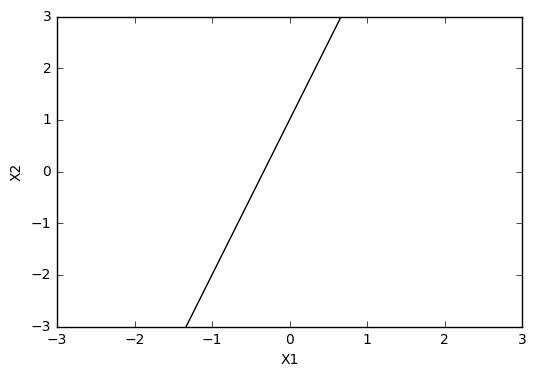

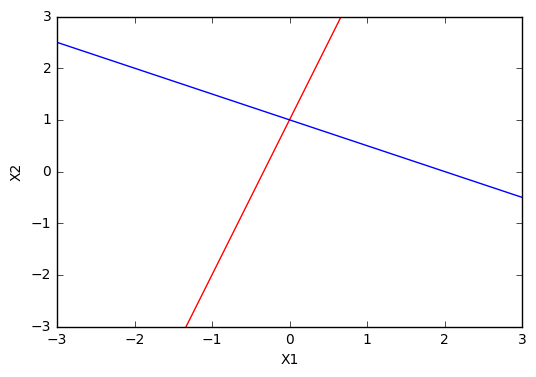

In [259]:
# write solution here
#3.(a)
from sklearn import svm # read more at: scikit-learn.org
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


beta1= 3
beta2= -1
beta0 = 1
M = 1/np.sqrt(beta1**2 + beta2**2)
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)



fig, ax = plt.subplots()
X1_range = [-3,3]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))

ax.plot(X1_range,X2_hyperplane,'-k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3]) 

plt.show()

#the points which are on the left side of the hyperlane is in "1+3X1 −X2 > 0" area, and the points which are on the 
#right side of the hyperplane is in "1+3X1 −X2 < 0" area.

#3.(b)
beta1= 3
beta2= -1
beta0 = 1

beta_1= 1
beta_2= 2
beta_0 = -2

fig, ax = plt.subplots()
X1_range = [-3,3]

X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_hyperplane1 = list(map(lambda x1:(-beta_0-beta_1*x1)/beta_2, X1_range))

ax.plot(X1_range,X2_hyperplane,'-k',color='r')
ax.plot(X1_range,X2_hyperplane1,'-k',color='b')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3]) 

plt.show()

#the points which are on the left side of the hyperlane is in "−2 + X1 + 2X2 < 0" area, and the points which are on the 
#right side of the hyperplane is in "−2 + X1 + 2X2 > 0" area.



## (4) Chapter 9, exercise 3

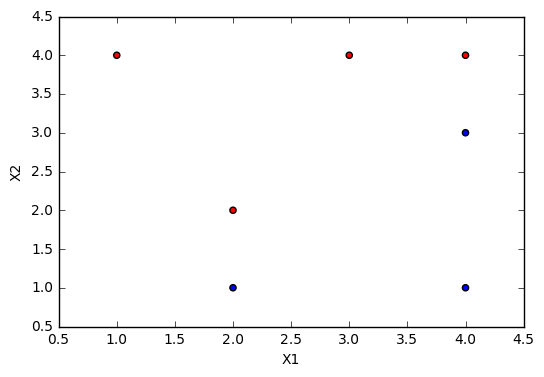

,Obs.,X1,X2,Y
0,1,3,4,Red
1,2,2,2,Red
2,3,4,4,Red
3,4,1,4,Red
4,5,2,1,Blue
5,6,4,3,Blue
6,7,4,1,Blue


In [214]:
#4.
import pandas as pd
df = pd.read_csv('observations.csv')
df

#4.(a)
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



beta0=  1.00 
beta1= -2.00 
beta2=  2.00
Margin: 0.353657001043
support vectors indexes: [4 5 1 2]


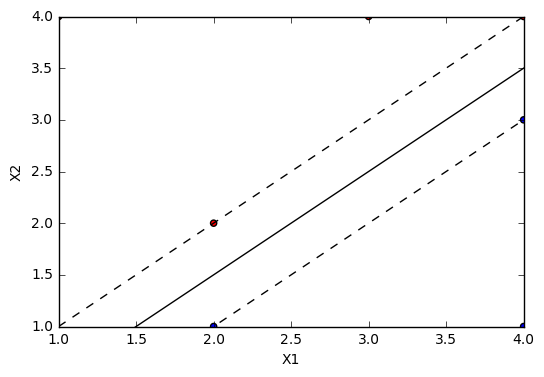

hyperplane equation is -2X1+2X2+1=0


In [209]:
#4.(b)
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['X1','X2']], df['Y'])

beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2)
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)
print('support vectors indexes:', clf.support_)
df.ix[clf.support_,:]


fig, ax = plt.subplots()
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired)
X1_range = [1,4]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))

ax.plot(X1_range,X2_hyperplane,'-k')
ax.plot(X1_range,X2_margin1,'--k')
ax.plot(X1_range,X2_margin2,'--k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xlim([1,4])
ax.set_ylim([1,4]) 

plt.show()
print ("hyperplane equation is -2X1+2X2+1=0")

In [ ]:
#4.(c)
#classification rule for the maximal margin classifier

#Definition rule for a classifier: Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.

#Definition rule for a maximal margin classifier:  a separating classifier with maximal margin
#Distance of  (x1,x2,...,xp) from the hyperplane is greater or equal to the margin

#values of beta1,beta2,and beta0
#from sklearn import svm
#clf = svm.SVC(kernel='linear',C=10**10)
#clf.fit(df[['X1','X2']], df['class'])
#beta1,beta2 = clf.coef_[0]
#beta0 = clf.intercept_[0]



In [210]:
#4.(d)
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['X1','X2']], df['Y'])

beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2)
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)


beta0=  1.00 
beta1= -2.00 
beta2=  2.00
Margin: 0.353657001043


In [233]:
#4.(e)
clf.support_
#array([4, 5, 1, 2], dtype=int32), which means indexes for support vectors are 1,2,4,5
#So support vectors are the 2nd, 3rd, 5th, and 6th points in df, which is
df1=df.iloc[1:6,0:3]
df1
df1.drop([3])




,Obs.,X1,X2
1,2,2,2
2,3,4,4
4,5,2,1
5,6,4,3


In [234]:
#4.(f)
df
#the 7th observation is (4,1), and it is not on the margin, so a slight movement of it would not affect the 
#maximal margin hyperplane.

,Obs.,X1,X2,Y
0,1,3,4,Red
1,2,2,2,Red
2,3,4,4,Red
3,4,1,4,Red
4,5,2,1,Blue
5,6,4,3,Blue
6,7,4,1,Blue


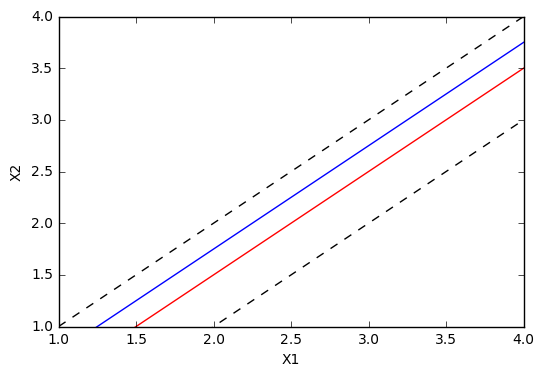

In [239]:
#4.(g)
beta1= -2
beta2= 2
beta0 = 1

beta_1= -2
beta_2= 2
beta_0 = 0.5

fig, ax = plt.subplots()
X1_range = [1,4]

X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_hyperplane1 = list(map(lambda x1:(-beta_0-beta_1*x1)/beta_2, X1_range))
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))

ax.plot(X1_range,X2_hyperplane,'-k',color='r')
ax.plot(X1_range,X2_hyperplane1,'-k',color='b')
ax.plot(X1_range,X2_margin1,'--k')
ax.plot(X1_range,X2_margin2,'--k')


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xlim([1,4])
ax.set_ylim([1,4]) 

plt.show()

#the red solid line is the maximal margin hyperplane, and the blue solid line is not.


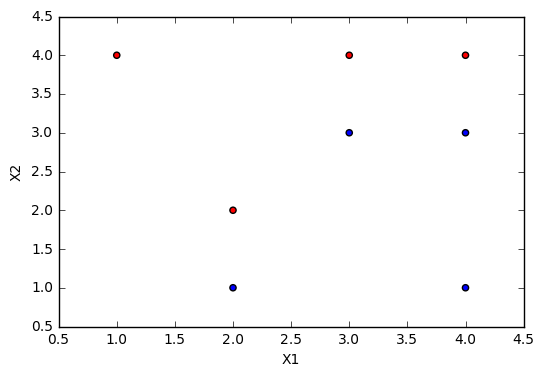

In [258]:
#4.(h)
import pandas as pd
df = pd.read_csv('observations.csv')
df

#Adding an additional point (3,3) would make these points lose linear separability
df.loc[len(df)]=['8','3','3','Blue'] 
df

plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Optional coding assignment
This is an __optional__ exercise, which will be graded and counted towards the class participation component of your grade (it could only improve your grade).

Read the first chapter in https://automatetheboringstuff.com/chapter1/ and solve the practice quetsions appearing at the end of the chapter.

In [ ]:
# Solution to Q1

In [ ]:
# Solution to Q2

In [ ]:
# Solution to Q3

In [ ]:
# Solution to Q4

In [ ]:
# Solution to Q5

In [ ]:
# Solution to Q6

In [ ]:
# Solution to Q7

In [ ]:
# Solution to Q8

In [ ]:
# Solution to Q9

In [ ]:
# Solution to Q10